# <p style="padding:10px;background-color:#8B0000;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Absenteeism Prediction: Regression Model Post-EDA"</p>

 

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Problem Statement</p>

- The goal of this project is to build and refine a regression model that can accurately predict the number of hours an employee will be absent based on various predictor variables.
- This model will be developed after thorough exploratory data analysis (EDA) and data preprocessing to ensure optimal model performance. 
- The successful prediction of absenteeism hours will assist organizations in better managing workforce availability and planning, ultimately aiding in the mitigation of productivity losses.

In [202]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [203]:
#Note- pd.read and then press tab to see all the available functions provided the particular library
#Note- pd.read_csv? - Give the function discription
raw_csv_data= pd.read_csv('Absenteeism_data.csv')

In [204]:
raw_csv_data
type(raw_csv_data)

pandas.core.frame.DataFrame

In [205]:
#Making a copy of the raw_csv_data
df=raw_csv_data.copy()
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23-07-2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23-05-2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23-05-2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24-05-2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24-05-2018,235,16,32,237.656,25,3,0,0,2


In [206]:
#Note- Axis 0 represents rows and axis 1 represents colomns
#Droppoing the unnecessary colomns
df.drop(['ID'], axis = 1, inplace= True)
df


,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,23,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,7,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,23,23-07-2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23-05-2018,179,22,40,237.656,22,2,2,0,8
696,6,23-05-2018,225,26,28,237.656,24,1,1,2,3
697,10,24-05-2018,330,16,28,237.656,25,2,0,0,8
698,23,24-05-2018,235,16,32,237.656,25,3,0,0,2


In [207]:
#Rename the colomns by removing spaces as the dot operator cant recognize spaces

df.rename(columns= {'Reason for Absence':'Reason_for_Absence', 'Transportation Expense':'Transportation_Expense','Distance to Work':'Distance_to_Work','Daily Work Load Average':'Daily_Work_Load_Average','Body Mass Index':'Body_Mass_Index','Absenteeism Time in Hours':'Absenteeism_Time_in_Hours'}, inplace=True)
df

,Reason_for_Absence,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,26,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,23,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,7,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,23,23-07-2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23-05-2018,179,22,40,237.656,22,2,2,0,8
696,6,23-05-2018,225,26,28,237.656,24,1,1,2,3
697,10,24-05-2018,330,16,28,237.656,25,2,0,0,8
698,23,24-05-2018,235,16,32,237.656,25,3,0,0,2


# Data Inspection

In [208]:
#df.shape

df.shape

(700, 11)

In [127]:
#df.describe() - gives statistical information of all numerical colomns

df.describe() 

,Reason_for_Absence,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,224.204286,30.135714,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,76.149012,15.458473,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,1157.000000,121.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [128]:
#df.info() - shows null values and data type of the colomns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_for_Absence         700 non-null    int64  
 1   Date                       700 non-null    object 
 2   Transportation_Expense     700 non-null    int64  
 3   Distance_to_Work           700 non-null    int64  
 4   Age                        700 non-null    int64  
 5   Daily_Work_Load_Average    700 non-null    float64
 6   Body_Mass_Index            700 non-null    int64  
 7   Education                  700 non-null    int64  
 8   Children                   700 non-null    int64  
 9   Pets                       700 non-null    int64  
 10  Absenteeism_Time_in_Hours  700 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 60.3+ KB


# Data Cleaning

In [209]:
#Checking null values

#df.sum() -gives sum of values in each colomn
df.isna().sum()


Reason_for_Absence           0
Date                         0
Transportation_Expense       0
Distance_to_Work             0
Age                          0
Daily_Work_Load_Average      0
Body_Mass_Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism_Time_in_Hours    0
dtype: int64

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\si

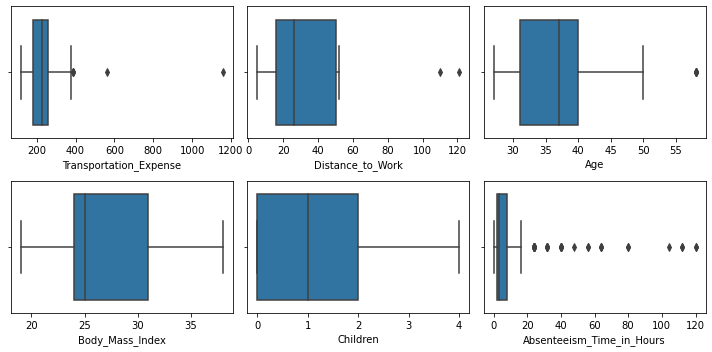

In [210]:
#Checking outliers

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Transportation_Expense'], ax = axs[0,0])
plt2 = sns.boxplot(df['Distance_to_Work'], ax = axs[0,1])
plt3 = sns.boxplot(df['Age'], ax = axs[0,2])
plt1 = sns.boxplot(df['Body_Mass_Index'], ax = axs[1,0])
plt2 = sns.boxplot(df['Children'], ax = axs[1,1])
plt3 = sns.boxplot(df['Absenteeism_Time_in_Hours'], ax = axs[1,2])

plt.tight_layout()

In [211]:
# Function to remove the outliers 

def remove_outliers(dataframe, column):
    percentile25 = dataframe[column].quantile(0.25)
    percentile75 = dataframe[column].quantile(0.75)
    iqr = percentile75-percentile25
    print(iqr)
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    outlier_free = (dataframe[column]> lower_limit) & (dataframe[column] < upper_limit)
    #print(bool_array)
    dataframe = dataframe[outlier_free]
    return dataframe


In [212]:
#Before removing the outlier
df.shape

(700, 11)

In [213]:
#Removing the otliers colomn wise

Numerical_cols = ['Transportation_Expense','Distance_to_Work','Absenteeism_Time_in_Hours']

for col in Numerical_cols:
    df = remove_outliers(df, col)

81.0
33.0
6.0


In [214]:
#Before after the outlier
df.shape

(652, 11)

In [108]:
df.head()

,Reason_for_Absence,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,26,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,23,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,7,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,23,23-07-2015,289,36,33,239.554,30,1,2,1,2


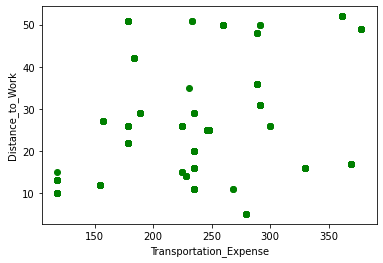

In [136]:
#Scatter Plot
plt.scatter(df.Transportation_Expense, df.Distance_to_Work,  color='green')
plt.xlabel("Transportation_Expense")
plt.ylabel("Distance_to_Work")
plt.show()

# Converting categorical to numerical data

In [115]:
#Identify all categorical columns and Encoding by one hot encoding method

#categorical =['Reason_for_Absence']

#df = pd.get_dummies(data=df, columns=categorical)


In [215]:
reason_columns = pd.get_dummies(df['Reason_for_Absence'])
reason_columns

,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [219]:
#Dropping the first colomn of the dummy colomn
reason_columns = pd.get_dummies(df['Reason_for_Absence'], drop_first = True)
#reason_columns

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [220]:
#Deleting the Reason_for_Absence as the dummy is already created
df = df.drop(['Reason_for_Absence'], axis=1)


In [221]:
#Reducing the dimensioality - fearture selection
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)


In [222]:
#Merging the newly added colomns to the main data set
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)


In [223]:
#Dropping the Reason_for_Absence colomn
#Note- inplace=True keeps the changes made permanent

df

,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,0,1,2,3
0,07-07-2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14-07-2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15-07-2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16-07-2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23-07-2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23-05-2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23-05-2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24-05-2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24-05-2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [224]:
#df.columns.values
column_names = ['Date', 'Transportation_Expense', 'Distance_to_Work', 'Age',
       'Daily_Work_Load_Average', 'Body_Mass_Index', 'Education',
       'Children', 'Pets', 'Absenteeism_Time_in_Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
df.columns = column_names
df.head()


,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07-07-2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14-07-2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15-07-2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16-07-2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23-07-2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [226]:
#Re ordering the colomns

column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                          'Date', 'Transportation_Expense', 'Distance_to_Work', 'Age',
       'Daily_Work_Load_Average', 'Body_Mass_Index', 'Education',
       'Children', 'Pets', 'Absenteeism_Time_in_Hours']

df = df[column_names_reordered]
df

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,0,0,0,1,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23-07-2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,23-05-2018,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,23-05-2018,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,24-05-2018,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,24-05-2018,235,16,32,237.656,25,3,0,0,2


In [254]:
#Creating a checkpoint to save the work done till now

df_rsn_mod = df.copy()

In [256]:
#Remove date colomn for time being
df_rsn_mod.drop(['Date'], axis=1, inplace=True)
df_rsn_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,235,16,32,237.656,25,3,0,0,2


# Splitting the Data into Training and Testing Sets

In [257]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_rsn_mod, train_size = 0.7, test_size = 0.3, random_state = 100)

In [258]:
#df_test
df_train

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
34,0,0,0,1,179,51,38,205.917,31,1,0,0,2
136,0,0,0,1,289,36,33,308.593,30,1,2,1,3
271,0,0,0,1,179,51,38,294.217,31,1,0,0,3
283,0,0,0,1,235,20,43,294.217,38,1,1,0,8
481,0,0,0,1,179,22,40,249.797,22,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0,0,0,1,228,14,58,222.196,22,1,2,1,3
60,0,0,0,1,179,51,38,241.476,31,1,0,0,3
383,0,0,0,1,291,31,40,251.818,25,1,1,1,2
88,0,0,0,1,225,26,28,306.345,24,1,1,2,1


# Doing the Rescaling

In [259]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [260]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Transportation_Expense', 'Distance_to_Work', 'Age', 'Daily_Work_Load_Average', 'Body_Mass_Index','Education','Children','Pets','Absenteeism_Time_in_Hours']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
34,0,0,0,1,0.234615,0.978723,0.354839,0.000000,0.631579,0.000000,0.00,0.000,0.1250
136,0,0,0,1,0.657692,0.659574,0.193548,0.593616,0.578947,0.000000,0.50,0.125,0.1875
271,0,0,0,1,0.234615,0.978723,0.354839,0.510502,0.631579,0.000000,0.00,0.000,0.1875
283,0,0,0,1,0.450000,0.319149,0.516129,0.510502,1.000000,0.000000,0.25,0.000,0.5000
481,0,0,0,1,0.234615,0.361702,0.419355,0.253690,0.157895,0.333333,0.50,0.000,0.0625


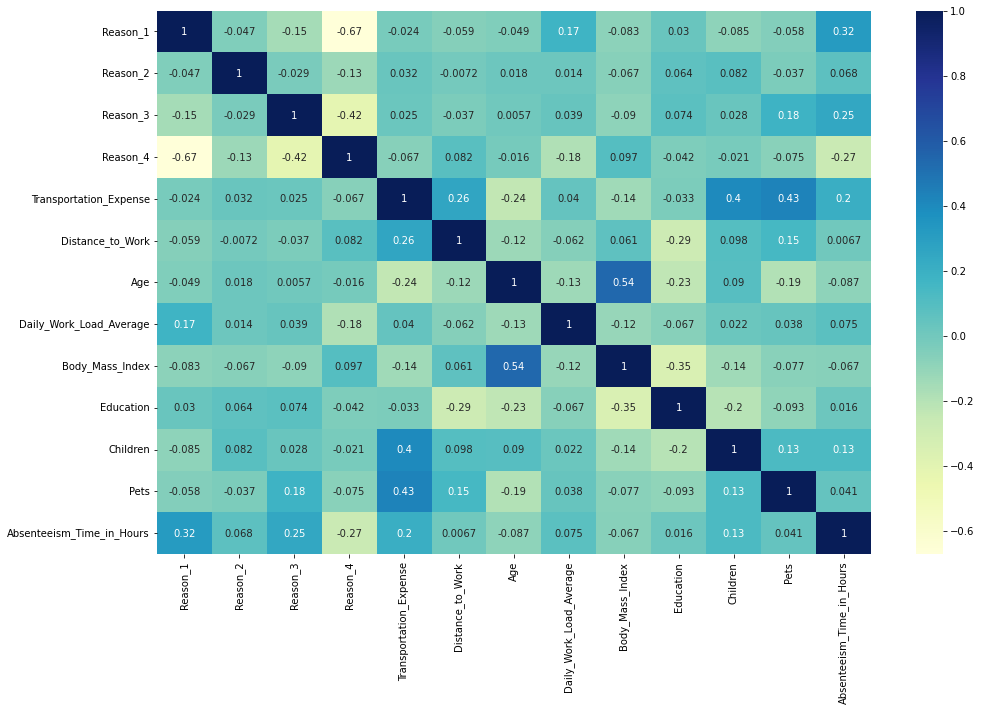

In [261]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Building regression Model

In [262]:
y_train = df_train.pop('Absenteeism_Time_in_Hours')
X_train = df_train

In [263]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

In [264]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [268]:
#Predicted traget value using the train data in the model
y_train_price = lm.predict(X_train)
y_train_price

array([ 0.18095614,  0.31381844,  0.18122398,  0.28918916,  0.19095416,
        0.22538097,  0.31388355,  0.51131095,  0.23783606,  0.20888543,
        0.2147814 ,  0.18105817,  0.23801533,  0.21500564,  0.04182475,
        0.14961744,  0.39492023,  0.1506419 ,  0.14954543,  0.14909724,
        0.21502996,  0.25622644,  0.14945022,  0.17833841,  0.30134967,
        0.30218121,  0.40068339,  0.39476524,  0.28454429,  0.25633277,
        0.181064  ,  0.30111417,  0.28413633,  0.18100552,  0.30123772,
        0.181064  ,  0.28412167,  0.2148466 ,  0.15060919,  0.33634478,
        0.26143023,  0.18113308,  0.1490637 ,  0.14947401,  0.14909906,
        0.18109537,  0.26131023,  0.44709122,  0.50488319,  0.15064605,
        0.15392153,  0.30102625,  0.41838941,  0.48666046,  0.1810493 ,
        0.25627261,  0.23792922,  0.44203436,  0.59892274,  0.20886289,
        0.17383619,  0.28901759,  0.41320914,  0.23800407,  0.15079139,
        0.21475761,  0.181064  ,  0.33629533,  0.190998  ,  0.36

In [269]:
#Finding the residual

res = (y_train_price - y_train)
res

34     0.055956
136    0.126318
271   -0.006276
283   -0.210811
481    0.128454
         ...   
620   -0.009162
60    -0.006436
383    0.131233
88     0.152418
560    0.027340
Name: Absenteeism_Time_in_Hours, Length: 456, dtype: float64

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

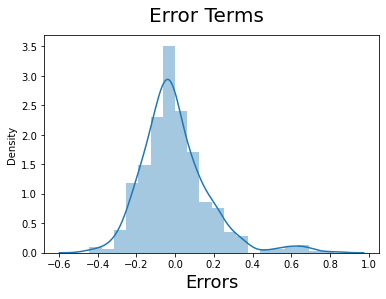

In [302]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

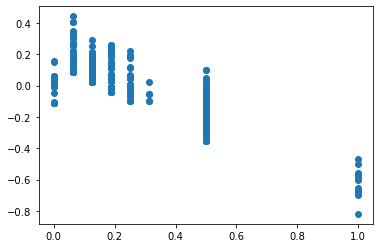

In [304]:
plt.scatter(y_train,res)
plt.show()

# Model Evaluation
**Applying the scaling on the test sets**

In [275]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Transportation_Expense', 'Distance_to_Work', 'Age', 'Daily_Work_Load_Average', 'Body_Mass_Index','Education','Children','Pets','Absenteeism_Time_in_Hours']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours
605,0,0,0,1,0.234615,0.978723,0.354839,0.337244,0.631579,0.000000,0.00,0.0,0.1250
347,0,0,0,1,0.234615,0.978723,0.354839,0.177560,0.631579,0.000000,0.00,0.0,0.0625
129,0,0,1,0,0.234615,0.446809,0.096774,0.593616,0.000000,0.666667,0.00,0.0,0.5000
427,1,0,0,0,0.965385,0.255319,0.129032,0.232166,0.315789,0.000000,0.75,0.0,0.5000
55,0,0,0,0,0.000000,0.170213,0.741935,0.205583,0.631579,0.000000,0.25,0.0,0.0000


In [276]:
#Dividing into X and Y test set(X contains all features and Y contains the target variable)

y_test = df_test.pop('Absenteeism_Time_in_Hours')
X_test = df_test

In [277]:
# Making predictions using the test data set 
y_pred = lm.predict(X_test)

In [278]:
#Finding R square value
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.3497862741055061

In [300]:
#Finding RMSE
import sklearn.metrics  
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)  
rmse=math.sqrt(mse)

print(' MSE:', mse ,'\n','RMSE:', rmse)

 MSE: 0.02973245536829315 
 RMSE: 0.17243101625952667


Text(0, 0.5, 'y_pred')

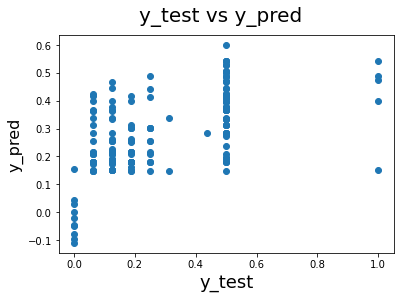

In [303]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label